### <font color='red'> Import packages</font>

In [ ]:
!pip3 install pandas tensorflow matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='red'> Read CSV file into pandas dataframe</font>

In [4]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.columns = [col.strip() for col in data.columns]

### <font color='red'> Print total observations(rows) and columns </font>

In [5]:
# Total rows
print(f"Total number of observations: {data.shape[0]}\n")

# Total columns
print(f"Total number of columns: {data.shape[1]}\n")

Total number of observations: 20531

Total number of columns: 61



### <font color='red'> Print descriptions of each columns </font>

In [ ]:
# Data descriptions
columns = data.columns
for column in columns:
    print(f"Description of column {column}: \n{data[column].describe()}\n")

In [8]:
pd.set_option('display.max_columns', None)
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000
mean,534.418392,9.957187,522.384053,0.554256,0.992158,0.697229,11.140617,3.597584,4.385661,1.245336,4.639626,7.338756,0.061906,0.159758,0.177244,0.074375,0.213628,0.150163,51.301154,1250.776929,372.046406,10161.213092,668067.493059,211364.602613,985.596862,5487.856950,2992.921749,3797.823006,9930.039928,6082.415814,0.165067,0.185524,0.189275,0.182845,0.143247,0.063027,0.071015,0.134041,0.206434,0.138098,0.177866,0.220201,0.257401,0.457462,0.134207,0.042903,0.016580,0.716496,0.275565,0.366162,0.098871,0.780708,-0.260026,-0.506020,-0.113509,0.279195,0.082787,0.342756,0.156704,3571.936873
std,118.184970,1.985154,448.842438,0.117062,0.088208,0.120432,11.054849,4.385854,8.458127,4.388874,0.497959,1.911089,0.240991,0.366391,0.381885,0.262387,0.409877,0.357240,89.675846,4436.140551,720.146083,51228.937124,271753.793391,133775.258954,1096.210348,6649.317136,1330.424767,17738.395222,39437.712168,22283.919813,0.371250,0.388732,0.391736,0.386549,0.350333,0.243017,0.256855,0.340705,0.276852,0.215733,0.257639,0.293195,0.304193,0.096484,0.096413,0.016822,0.010980,0.160328,0.149010,0.090876,0.072577,0.222387,0.126902,0.279337,0.100237,0.323282,0.263932,0.189160,0.227940,13716.095733
min,326.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018191,0.018182,0.018182,0.018182,0.018182,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,435.000000,9.000000,234.000000,0.483536,1.000000,0.637639,5.000000,1.000000,1.000000,0.000000,4.483243,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,450.000000,184.636250,0.000000,617900.000000,130586.607143,0.000000,3425.011067,2297.668909,488.000000,873.000000,833.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025042,0.025006,0.025032,0.025072,0.02857

### <font color='red'> Print how many data is missing </font>

In [ ]:
print(f"Missing data:\n{data.isnull().sum()}")

Missing data:
url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64


### <font color='red'> Indicate of No missing value due to the color of the heatmap is the same </font>

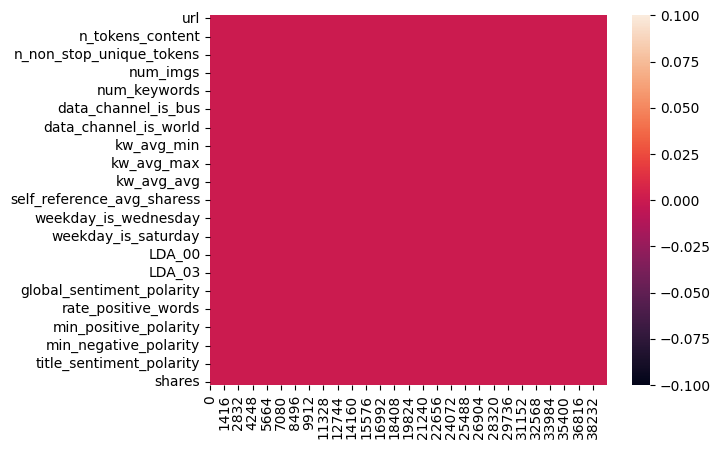

In [ ]:
sns.heatmap(data.isna().transpose())
plt.show()

### <font color='red'> Plot data </font>

In [ ]:
fig = plt.figure(figsize=(50, 50))

# Remove all data can not be plotted
plot_columns = []
for column in columns:
    if column not in ['url', 'timedelta', 'shares']:
        plot_columns.append(column)

plt_cols = 2
plt_rows = 29

fig, axes = plt.subplots(nrows=plt_rows, ncols=plt_cols, figsize=(20, 6*plt_rows))

for i, col in enumerate(plot_columns):
    ax = axes[i // plt_cols, i % plt_cols]
    ax.scatter(data[col], data['shares'])
    ax.set_xlabel(col)
    ax.set_ylabel('shares')
    ax.set_title(f'{col} vs shares')

plt.tight_layout()
plt.show()

### <font color='red'> Data distribution </font>

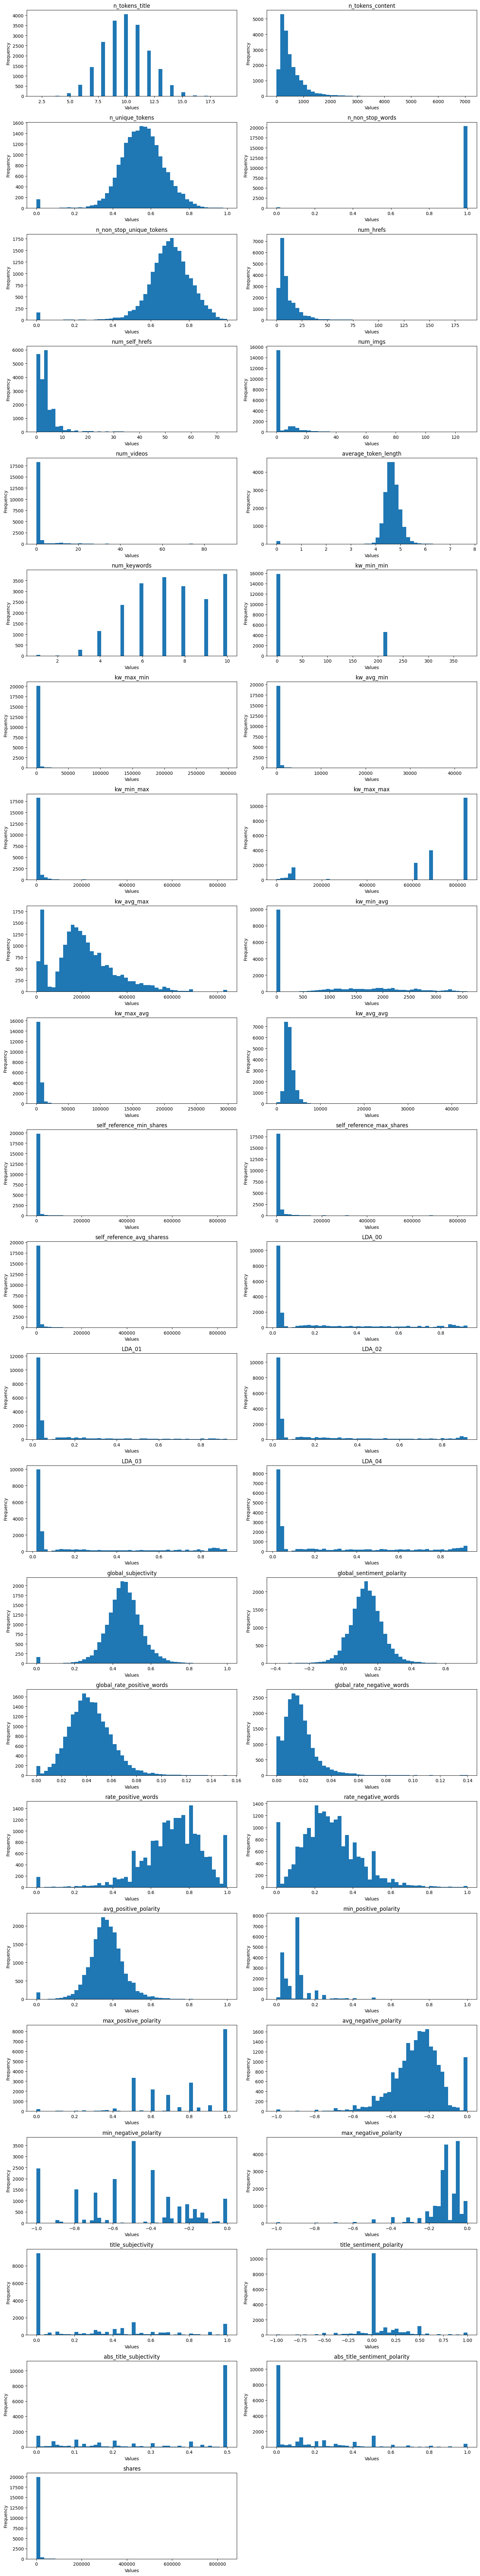

In [19]:
# Continuous columns histograms

# List of categorical columns provided by the dataset
categorical_cols = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
    'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'url',
    'timedelta'
]
extra_drop = [
    "n_unique_tokens", "n_non_stop_words","n_non_stop_unique_tokens"
]
# Remove discrete columns from being plotted
continuous_data = data.drop(columns=categorical_cols+extra_drop)

fig, axes = plt.subplots(nrows=len(continuous_data.columns) // 2 + len(continuous_data.columns) % 2, ncols=2, figsize=(15, 80))

for ax, column in zip(axes.flatten(), continuous_data.columns):
    continuous_data[column].hist(ax=ax, bins=50, grid=False)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')
# Hide any unused subplots
for i in range(len(continuous_data.columns), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


Data distribution for related one hot encoded columns

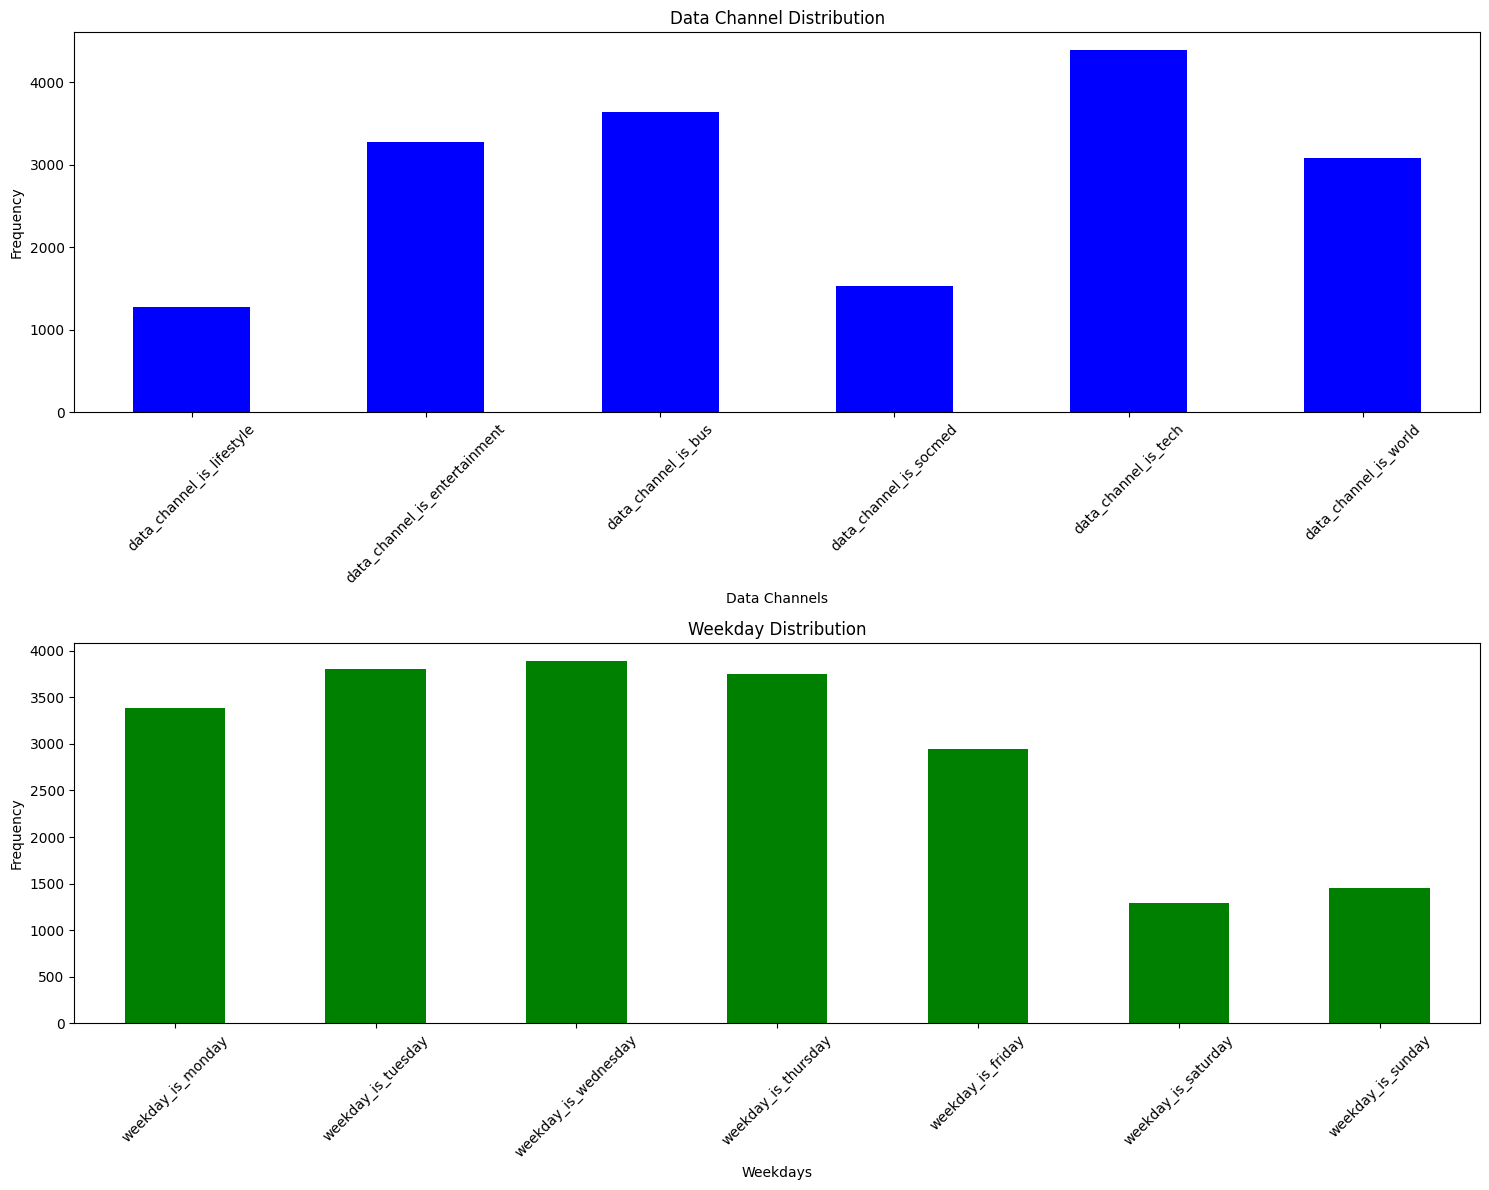

In [27]:
#Related one-hot encoded columns histograms

data_channel_cols = [col for col in data.columns if col.strip().startswith('data_channel_is_')]
weekday_cols = [col for col in data.columns if col.strip().startswith('weekday_is_')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting for data_channel columns
data[data_channel_cols].sum().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Data Channel Distribution')
axes[0].set_xlabel('Data Channels')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Tilting x axis labels

# Plotting for weekday columns
data[weekday_cols].sum().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Weekday Distribution')
axes[1].set_xlabel('Weekdays')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Tilting x axis labels

plt.tight_layout()
plt.show()